In [2]:
%run imports.ipynb

In [48]:
meta = pd.read_csv('source_data/li2016_variant_calls.csv')

lpmd = pd.read_csv('source_data/li2016_genomewide_lpmd.csv')
lpmd = lpmd[lpmd.distance <= 16].groupby('run_rrbs').agg({'n_concordant': 'sum', 'n_discordant': 'sum'}).reset_index()
lpmd['lpmd'] = lpmd.n_discordant / (lpmd.n_concordant + lpmd.n_discordant)

meta = meta.merge(lpmd[['run_rrbs', 'lpmd']], on='run_rrbs')

In [49]:
basedir = Path('/data/project/SNUH_DNMT3A/data/dbgap-data/64271/PhenoGenotypeFiles/RootStudyConsentSet_phs001027.Epigenetics_AML.v2.p1.c1.GRU-PUB/PhenotypeFiles')
pheno = pd.read_csv(basedir / 'phs001027.v2.pht005216.v1.p1.c1.Epigenetics_AML_Subject_Phenotypes.GRU-PUB.txt', sep='\t', skiprows=10)

sample = []
for r in pheno.to_records():
    if r.Disease_stage == 'Diagnosis':
        sample.append(f'{r.SUBJECT_ID}_Dx')
    else:
        sample.append(f'{r.SUBJECT_ID}_Rel')

pheno['name'] = sample

In [50]:
pheno = pheno.merge(meta, on='name')

<AxesSubplot:xlabel='Age', ylabel='lpmd'>

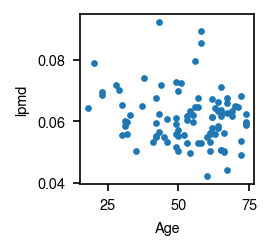

In [51]:
pheno.plot.scatter(x='Age', y='lpmd')

In [52]:
pheno

,dbGaP_Subject_ID,SUBJECT_ID,Age,Disease_stage,sex,Cytogenetics,mutGenes,FAB,WBC,TTR,name,run_rrbs,run_wxs,run_rnaseq,DNMT3A_mut1,DNMT3A_mut2,DNMT3A_mut3,DNMT3A_pos1,DNMT3A_pos2,DNMT3A_pos3,DNMT3A_mutcount,DNMT3A_truncation1,DNMT3A_truncation2,DNMT3A_truncation2.1,DNMT3A_stability1,DNMT3A_stability2,DNMT3A_stability3,status,lpmd
0,1410285,AML_074,71,Diagnosis,M,"49,XY,+13,+13,+19 [21]",None,unknown,unknown,398,AML_074_Dx,SRR3088187,SRR3088188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT,0.064597
1,1410285,AML_074,72,Relapse,M,"49,XY,+13,+13,+19",unknown,unknown,7.2,NaN,AML_074_Rel,SRR3088190,SRR3088191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT,0.068160
2,1410286,AML_075,49,Diagnosis,F,"46,XX, INV(16) [22]",None,unknown,unknown,441,AML_075_Dx,SRR3088192,SRR3088193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT,0.051601
3,1410286,AML_075,50,Relapse,F,"46,XX,inv(16)(p13q22)[7] /46,XX[13]",unknown,unknown,2.9,NaN,AML_075_Rel,SRR3088195,SRR3088196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT,0.055061
4,1410289,AML_078,31,Diagnosis,F,"46,XX,inv(16)(p13q22)[8]/47,XX,+8,inv(16)(p13q...",None,M4,26.8,398,AML_078_Dx,SRR3088201,SRR3088202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT,0.060204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,1410344,AML_133,58,Relapse,F,46 XX[20],unknown,M1,92.6,NaN,AML_133_Rel,SRR3088567,SRR3088569,SRR3088568,p.Pro700Thr,NaN,NaN,700.0,NaN,NaN,1.0,0.0,0.0,0.0,0.349564,NaN,NaN,INS,0.085420
90,1410346,AML_135,74,Diagnosis,M,monosomy 7 [7/17],FLT3-ITD,unknown,121.9,171,AML_135_Dx,SRR3088572,SRR3088573,SRR15674501,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT,0.059452
91,1410346,AML_135,74,Relapse,M,"45,XY,-7,add(20)(p13)_cp18",FLT3-ITD,unknown,6.2,NaN,AML_135_Rel,SRR3088575,SRR3088576,SRR15674502,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT,0.062264
92,1410350,AML_139,55,Diagnosis,F,"46, XX",NPM1,unknown,18.4,158,AML_139_Dx,SRR3088583,SRR3088585,SRR3088584,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT,0.062101


In [53]:
pheno

,dbGaP_Subject_ID,SUBJECT_ID,Age,Disease_stage,sex,Cytogenetics,mutGenes,FAB,WBC,TTR,name,run_rrbs,run_wxs,run_rnaseq,DNMT3A_mut1,DNMT3A_mut2,DNMT3A_mut3,DNMT3A_pos1,DNMT3A_pos2,DNMT3A_pos3,DNMT3A_mutcount,DNMT3A_truncation1,DNMT3A_truncation2,DNMT3A_truncation2.1,DNMT3A_stability1,DNMT3A_stability2,DNMT3A_stability3,status,lpmd
0,1410285,AML_074,71,Diagnosis,M,"49,XY,+13,+13,+19 [21]",None,unknown,unknown,398,AML_074_Dx,SRR3088187,SRR3088188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT,0.064597
1,1410285,AML_074,72,Relapse,M,"49,XY,+13,+13,+19",unknown,unknown,7.2,NaN,AML_074_Rel,SRR3088190,SRR3088191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT,0.068160
2,1410286,AML_075,49,Diagnosis,F,"46,XX, INV(16) [22]",None,unknown,unknown,441,AML_075_Dx,SRR3088192,SRR3088193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT,0.051601
3,1410286,AML_075,50,Relapse,F,"46,XX,inv(16)(p13q22)[7] /46,XX[13]",unknown,unknown,2.9,NaN,AML_075_Rel,SRR3088195,SRR3088196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT,0.055061
4,1410289,AML_078,31,Diagnosis,F,"46,XX,inv(16)(p13q22)[8]/47,XX,+8,inv(16)(p13q...",None,M4,26.8,398,AML_078_Dx,SRR3088201,SRR3088202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT,0.060204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,1410344,AML_133,58,Relapse,F,46 XX[20],unknown,M1,92.6,NaN,AML_133_Rel,SRR3088567,SRR3088569,SRR3088568,p.Pro700Thr,NaN,NaN,700.0,NaN,NaN,1.0,0.0,0.0,0.0,0.349564,NaN,NaN,INS,0.085420
90,1410346,AML_135,74,Diagnosis,M,monosomy 7 [7/17],FLT3-ITD,unknown,121.9,171,AML_135_Dx,SRR3088572,SRR3088573,SRR15674501,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT,0.059452
91,1410346,AML_135,74,Relapse,M,"45,XY,-7,add(20)(p13)_cp18",FLT3-ITD,unknown,6.2,NaN,AML_135_Rel,SRR3088575,SRR3088576,SRR15674502,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT,0.062264
92,1410350,AML_139,55,Diagnosis,F,"46, XX",NPM1,unknown,18.4,158,AML_139_Dx,SRR3088583,SRR3088585,SRR3088584,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,WT,0.062101


In [54]:
stats.pearsonr(
    pheno.Age, pheno.lpmd
)

(-0.19610729454268794, 0.05818133386792289)